In [49]:
import pandas            as pd
import numpy             as np
import matplotlib
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
%matplotlib inline
matplotlib.style.use('ggplot')

In [50]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version 0.18.1
Matplotlib version 1.5.3


In [51]:
filepath = r'./NYPD_Complaint_Data_Historic.csv'
df       = pd.read_csv(filepath, dtype = {'PREM_TYP_DESC':str, 'PARKS_NM':str})

In [52]:
df.dtypes

CMPLNT_NUM             int64
CMPLNT_FR_DT          object
CMPLNT_FR_TM          object
CMPLNT_TO_DT          object
CMPLNT_TO_TM          object
RPT_DT                object
KY_CD                  int64
OFNS_DESC             object
PD_CD                float64
PD_DESC               object
CRM_ATPT_CPTD_CD      object
LAW_CAT_CD            object
JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
PARKS_NM              object
HADEVELOPT            object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lat_Lon               object
dtype: object

## Data Preprocessing

In [53]:
# del df['CMPLNT_NUM']
del df['CMPLNT_TO_DT']
del df['CMPLNT_TO_TM']
del df['RPT_DT']

Here filter three recent years crime records.

In [54]:
# extract 2013 2014 2015 data
data = df.loc[df['CMPLNT_FR_DT'].fillna('NaN').str.contains('(2013|2014|2015)')]
data.head(10)

/Users/xiaohangsu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,N.Y. POLICE DEPT,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",COMPLETED,FELONY,N.Y. POLICE DEPT,...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/2015,23:18:00,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",ATTEMPTED,FELONY,N.Y. POLICE DEPT,...,71.0,FRONT OF,DRUG STORE,NaN,NaN,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/2015,23:15:00,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,7.0,OPPOSITE OF,STREET,NaN,NaN,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/2015,23:15:00,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,...,46.0,FRONT OF,STREET,NaN,NaN,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/2015,23:15:00,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,48.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/2015,23:10:00,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,...,19.0,INSIDE,DRUG STORE,NaN,NaN,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


### Total Distinct Crime

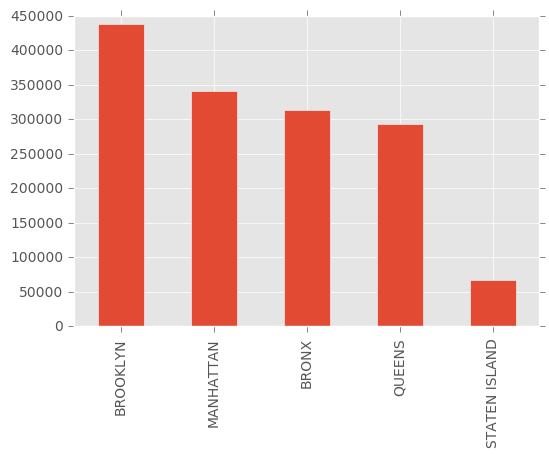

In [55]:
data['BORO_NM'].value_counts().plot(kind='bar')

### Time

#### Date

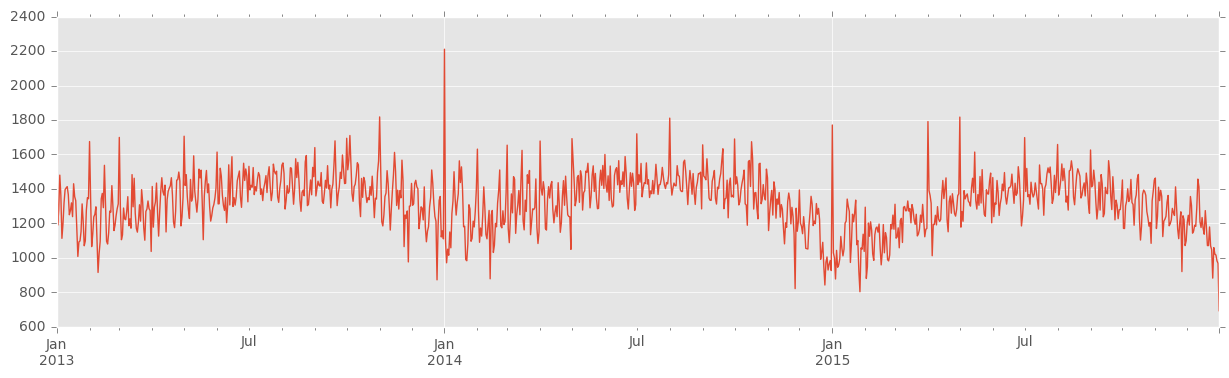

In [60]:
# plt.figure()
daysData = data['CMPLNT_FR_DT'].value_counts()
daysData.index = pd.to_datetime(daysData.index)
daysData.sort_index().plot(figsize=(15, 4))

#### Time

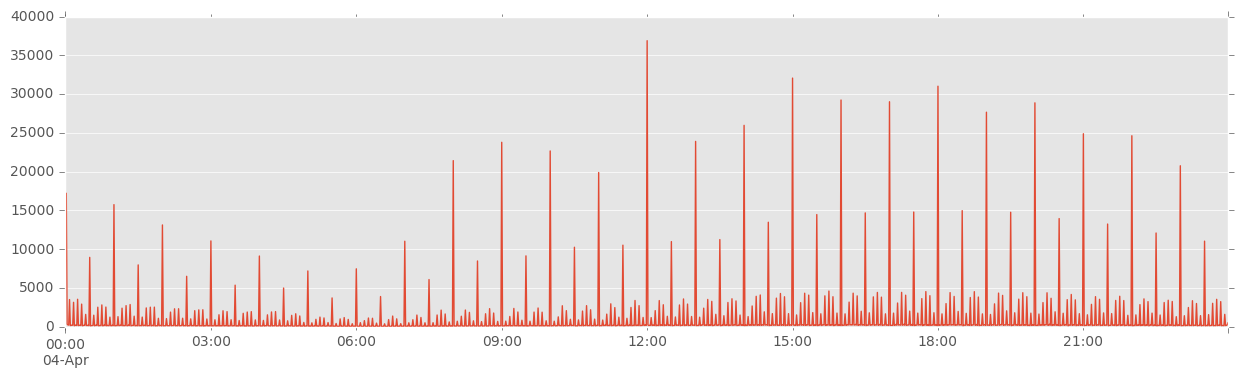

In [73]:
timeData = data['CMPLNT_FR_TM'].value_counts()
timeData.index = pd.to_datetime(timeData.index)
timeData.sort_index().plot(figsize=(15, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x198b7f5f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x159c794e0>]], dtype=object)

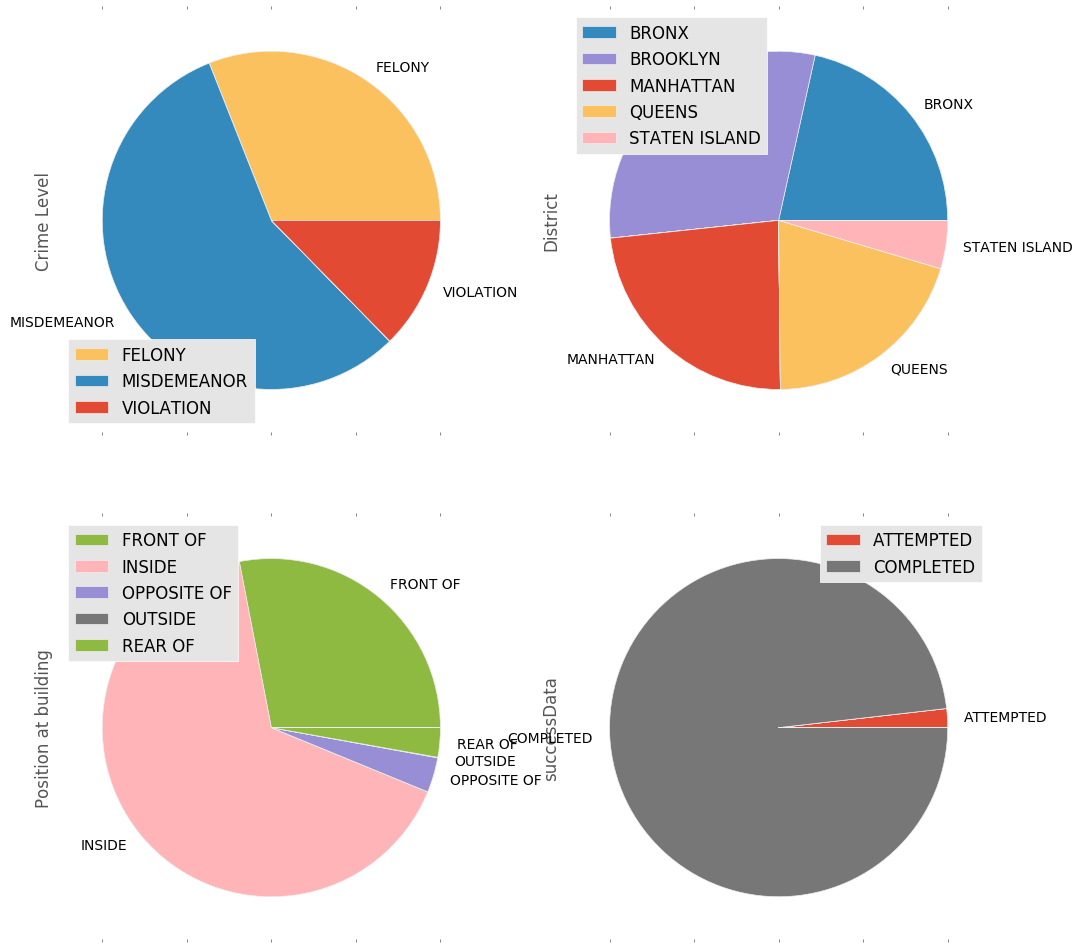

In [115]:
successData  = data['CRM_ATPT_CPTD_CD'].value_counts()
crimeLevel   = data['LAW_CAT_CD'].value_counts()
positionData = data['LOC_OF_OCCUR_DESC'].value_counts();
districtData = data['BORO_NM'].value_counts();
df = pd.DataFrame({ 'successData': successData,
                   'Crime Level': crimeLevel, 'Position at building': positionData, 'District': districtData})
df.plot(kind="pie", subplots=True, figsize=(12, 12), layout=(2,2))